In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import Bio
from Bio import SeqIO
import tensorflow as tf

In [2]:
df1 = pd.read_csv('pdb_data_no_dups.csv')
df1.head(10)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
5,102M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,1.84,18010.64,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
6,103D,DNA,SOLUTION NMR,DNA,24,NaN,7502.93,NaN,NaN,NaN,NaN,NaN,NaN,1994.0
7,103L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,167,1.90,19092.72,NaN,NaN,2.70,54.46,NaN,NaN,1993.0
8,103M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18093.78,NaN,NaN,3.09,60.30,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
9,104D,DNA-RNA HYBRID,SOLUTION NMR,DNA/RNA Hybrid,24,NaN,7454.78,NaN,NaN,NaN,NaN,NaN,NaN,1995.0


In [3]:
df1.shape

(141401, 14)

In [4]:
df1.keys()

Index(['structureId', 'classification', 'experimentalTechnique',
       'macromoleculeType', 'residueCount', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

In [5]:
df2 = pd.read_csv('pdb_data_seq.csv')
df2.head(10)

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
5,102D,A,CGCAAATTTGCG,24,DNA
6,102D,B,CGCAAATTTGCG,24,DNA
7,102L,A,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,165,Protein
8,102M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
9,103D,A,GTGGAATGGAAC,24,DNA


In [6]:
df2.shape

(467304, 5)

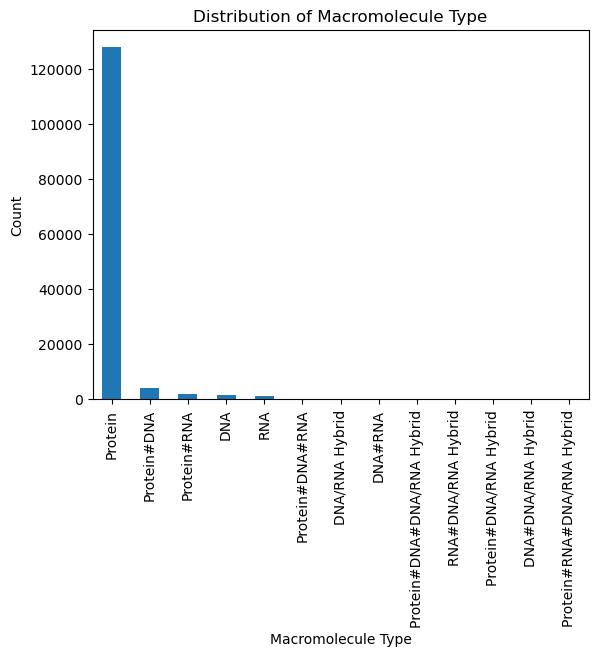

In [7]:
df1['macromoleculeType'].value_counts().plot(kind='bar')
plt.xlabel('Macromolecule Type')
plt.ylabel('Count')
plt.title('Distribution of Macromolecule Type')
plt.show()

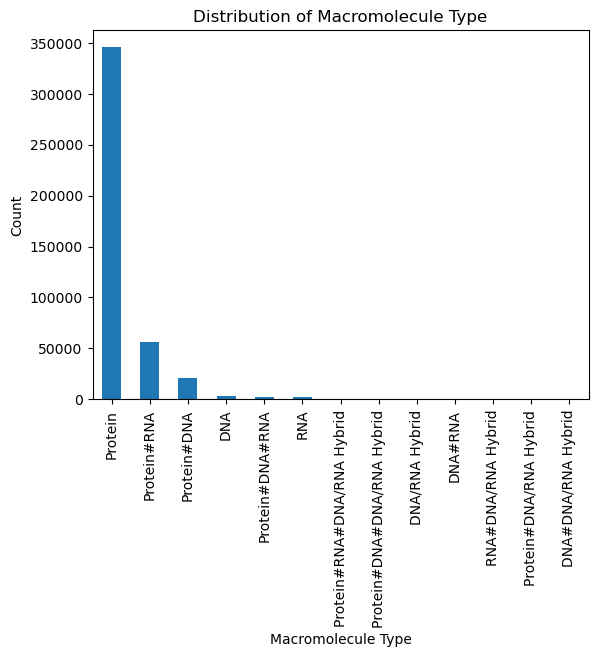

In [8]:
df2['macromoleculeType'].value_counts().plot(kind='bar')
plt.xlabel('Macromolecule Type')
plt.ylabel('Count')
plt.title('Distribution of Macromolecule Type')
plt.show()

In [9]:
merged_df = pd.merge(df1, df2, on=['structureId','residueCount', 'macromoleculeType'], how='outer')

In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471811 entries, 0 to 471810
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471811 non-null  object 
 1   classification            471807 non-null  object 
 2   experimentalTechnique     471811 non-null  object 
 3   macromoleculeType         435379 non-null  object 
 4   residueCount              471811 non-null  int64  
 5   resolution                449845 non-null  float64
 6   structureMolecularWeight  471811 non-null  float64
 7   crystallizationMethod     314863 non-null  object 
 8   crystallizationTempK      317806 non-null  float64
 9   densityMatthews           390156 non-null  float64
 10  densityPercentSol         390278 non-null  float64
 11  pdbxDetails               385664 non-null  object 
 12  phValue                   340901 non-null  float64
 13  publicationYear           414031 non-null  f

In [11]:
cleaned_df = merged_df.dropna(axis=0)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215142 entries, 5 to 471315
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               215142 non-null  object 
 1   classification            215142 non-null  object 
 2   experimentalTechnique     215142 non-null  object 
 3   macromoleculeType         215142 non-null  object 
 4   residueCount              215142 non-null  int64  
 5   resolution                215142 non-null  float64
 6   structureMolecularWeight  215142 non-null  float64
 7   crystallizationMethod     215142 non-null  object 
 8   crystallizationTempK      215142 non-null  float64
 9   densityMatthews           215142 non-null  float64
 10  densityPercentSol         215142 non-null  float64
 11  pdbxDetails               215142 non-null  object 
 12  phValue                   215142 non-null  float64
 13  publicationYear           215142 non-null  float6

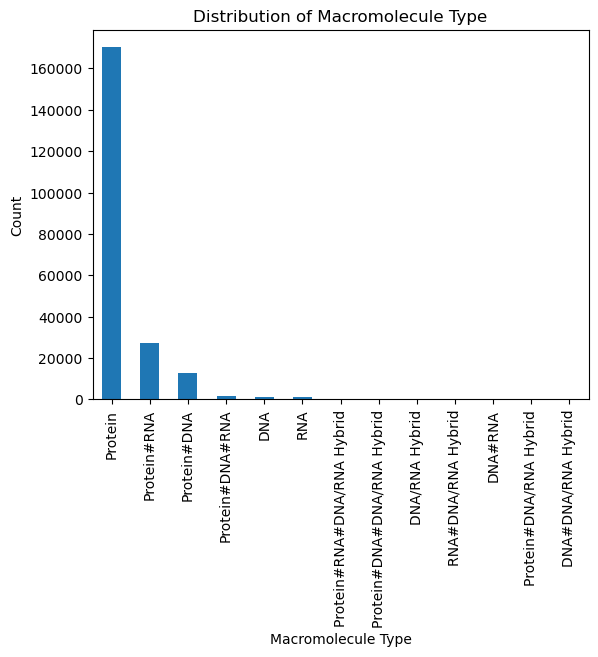

In [12]:
cleaned_df['macromoleculeType'].value_counts().plot(kind='bar')
plt.xlabel('Macromolecule Type')
plt.ylabel('Count')
plt.title('Distribution of Macromolecule Type')
plt.show()

In [13]:
cleaned_df.head()

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
5,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,A,CGCAAATTTGCG
6,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,B,CGCAAATTTGCG
45,110D,DNA,X-RAY DIFFRACTION,DNA,6,1.90,2337.73,"VAPOR DIFFUSION, SITTING DROP",277.0,2.90,57.63,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1993.0,A,CGGCCG
48,111D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.0,2.29,46.25,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1989.0,A,CGCAAATTGGCG
49,111D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.0,2.29,46.25,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1989.0,B,CGCAAATTGGCG


In [14]:
cleaned_df.shape

(215142, 16)

In [15]:
cleaned_df.isnull().sum()

structureId                 0
classification              0
experimentalTechnique       0
macromoleculeType           0
residueCount                0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
publicationYear             0
chainId                     0
sequence                    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Convert categorical data to numerical data if necessary
encoder = LabelEncoder()
cleaned_df['sequence'] = encoder.fit_transform(cleaned_df['sequence'])

# Select only relevant features
X = cleaned_df[['sequence', 'residueCount']]
y = cleaned_df['macromoleculeType']

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\jedia\AppData\Local\Temp\ipykernel_28164\2604219589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['sequence'] = encoder.fit_transform(cleaned_df['sequence'])


[[  320     0     0     4    14     5     0     0     0     0     0    12
      0]
 [    2     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    2     0     8     0     0     1     0     0     0     0     0     2
      0]
 [    4     0     0    14     1     0     0     0     0     0     0     2
      0]
 [    6     0     1     0 41873   404     2    31     0   143     0    13
      0]
 [    8     0     1     0   603  2593     2    15     0    35     0     6
      0]
 [    0     0     0     0    13    16    10     4     0     0     0     0
      0]
 [    0     0     0     0    59    39     0   231     0    26     0     0
      0]
 [    0     0     0     0     3     2     0     0     0     2     0     0
      0]
 [    0     0     0     0   383    81     2    18     0  6403     2     4
      0]
 [    0     0     0     0     0     1     0     0     0    29     5     0
      0]
 [   30     0     0     2     4     3     0     4     0     8     0   262
      1]
 [  

C:\Users\jedia\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jedia\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                       DNA       0.86      0.90      0.88       355
        DNA#DNA/RNA Hybrid       0.00      0.00      0.00         2
                   DNA#RNA       0.80      0.62      0.70        13
            DNA/RNA Hybrid       0.70      0.67      0.68        21
                   Protein       0.97      0.99      0.98     42473
               Protein#DNA       0.82      0.79      0.81      3263
Protein#DNA#DNA/RNA Hybrid       0.62      0.23      0.34        43
           Protein#DNA#RNA       0.76      0.65      0.70       355
    Protein#DNA/RNA Hybrid       0.00      0.00      0.00         7
               Protein#RNA       0.96      0.93      0.95      6893
Protein#RNA#DNA/RNA Hybrid       0.71      0.14      0.24        35
                       RNA       0.85      0.83      0.84       314
        RNA#DNA/RNA Hybrid       0.80      0.33      0.47        12

                  accuracy                    

C:\Users\jedia\anaconda3\envs\capstone\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
cleaned_df['macromoleculeType'].value_counts()

macromoleculeType
Protein                       170154
Protein#RNA                    27332
Protein#DNA                    12997
Protein#DNA#RNA                 1450
DNA                             1404
RNA                             1278
Protein#RNA#DNA/RNA Hybrid       163
Protein#DNA#DNA/RNA Hybrid       147
DNA/RNA Hybrid                    91
RNA#DNA/RNA Hybrid                46
DNA#RNA                           40
Protein#DNA/RNA Hybrid            38
DNA#DNA/RNA Hybrid                 2
Name: count, dtype: int64

In [19]:
cleaned_df['experimentalTechnique'].value_counts()

experimentalTechnique
X-RAY DIFFRACTION                         215089
NEUTRON DIFFRACTION                           19
X-RAY DIFFRACTION, EPR                        13
POWDER DIFFRACTION                             6
ELECTRON CRYSTALLOGRAPHY                       6
NEUTRON DIFFRACTION, X-RAY DIFFRACTION         5
SOLUTION SCATTERING, X-RAY DIFFRACTION         2
EPR, X-RAY DIFFRACTION                         1
X-RAY DIFFRACTION, NEUTRON DIFFRACTION         1
Name: count, dtype: int64

In [20]:
class_counts = cleaned_df['classification'].value_counts()
class_counts

classification
HYDROLASE                               23115
RIBOSOME                                19120
TRANSFERASE                             18270
OXIDOREDUCTASE                          17037
IMMUNE SYSTEM                            9712
                                        ...  
RNA BINDING PROTEIN, PROTEIN BINDING        1
actin-binding protein                       1
DRUG/DNA                                    1
Cell Adhesion, Membrane Protein             1
lipid transport/activator                   1
Name: count, Length: 2511, dtype: int64

In [27]:
top4_proteins = class_counts.head(4)


In [23]:
colors = ['blue', 'green', 'orange', 'red']

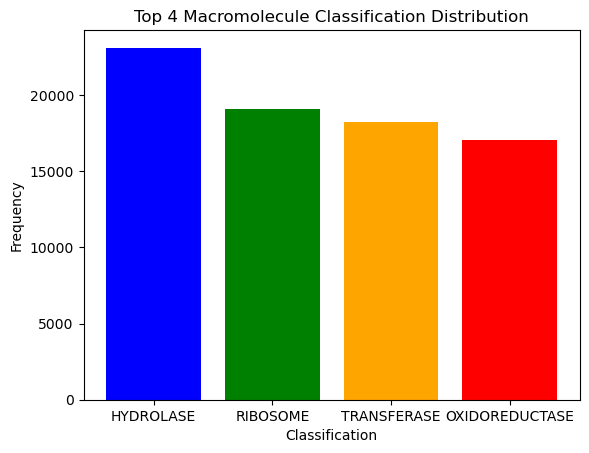

In [24]:
plt.bar(top4_proteins.index, top4_proteins.values, color=colors)
plt.xlabel('Classification')
plt.ylabel('Frequency')
plt.title('Top 4 Macromolecule Classification Distribution')
plt.show()

In [26]:
# Create new data frame containing only the rows and columns associated with protein
cleaned_df

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence
5,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.00,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,A,4794
6,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.00,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0,B,4794
45,110D,DNA,X-RAY DIFFRACTION,DNA,6,1.90,2337.73,"VAPOR DIFFUSION, SITTING DROP",277.00,2.90,57.63,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1993.0,A,4946
48,111D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.00,2.29,46.25,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1989.0,A,4792
49,111D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7374.83,"VAPOR DIFFUSION, SITTING DROP",277.00,2.29,46.25,"pH 6.60, VAPOR DIFFUSION, SITTING DROP, temper...",6.6,1989.0,B,4792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471129,6FAH,FLAVOPROTEIN,X-RAY DIFFRACTION,Protein,2074,3.13,231360.91,"VAPOR DIFFUSION, SITTING DROP",293.15,3.49,64.73,"PEG 4000, Tris/HCl, Lithium sulphate",8.5,2018.0,D,38979
471130,6FAH,FLAVOPROTEIN,X-RAY DIFFRACTION,Protein,2074,3.13,231360.91,"VAPOR DIFFUSION, SITTING DROP",293.15,3.49,64.73,"PEG 4000, Tris/HCl, Lithium sulphate",8.5,2018.0,E,22452
471131,6FAH,FLAVOPROTEIN,X-RAY DIFFRACTION,Protein,2074,3.13,231360.91,"VAPOR DIFFUSION, SITTING DROP",293.15,3.49,64.73,"PEG 4000, Tris/HCl, Lithium sulphate",8.5,2018.0,F,34843
471314,7BNA,DNA,X-RAY DIFFRACTION,DNA,24,1.90,7326.78,VAPOR DIFFUSION,290.00,2.27,45.79,"pH 7.50, VAPOR DIFFUSION, temperature 290.00K",7.5,1985.0,A,4823


In [28]:
cleaned_df.shape

(215142, 16)